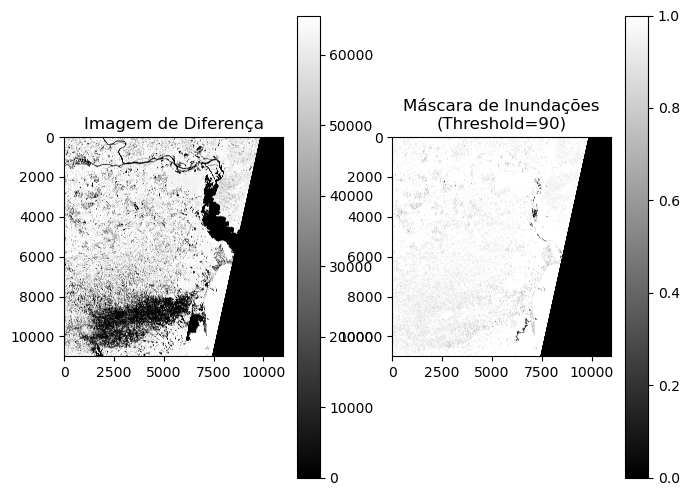

Imagem salva em: flooded_mask_threshold_90.tif


In [8]:
import numpy as np
import rasterio
import matplotlib.pyplot as plt

# Função para ler uma banda específica de uma imagem e obter metadados
def read_band_and_metadata(file_path, band_number):
    with rasterio.open(file_path) as src:
        band = src.read(band_number)
        metadata = src.meta
    return band, metadata

# Função para processar imagens e ajustar o limiar
def process_images_with_threshold(image1_path, image2_path, band_number, threshold):
    try:
        # Carregar as bandas NIR das duas imagens e obter metadados
        nir_image1, metadata1 = read_band_and_metadata(image1_path, band_number)
        nir_image2, metadata2 = read_band_and_metadata(image2_path, band_number)
        
        # Verifique se os metadados são iguais (assumimos que são iguais para simplificação)
        if metadata1 != metadata2:
            raise ValueError("Os metadados das imagens não correspondem.")

        # Subtrair as bandas NIR
        difference_image = nir_image2 - nir_image1

        # Aplicar um threshold para destacar áreas de mudança
        flooded_mask = np.where(difference_image > threshold, 1, 0)

        # Visualizar a imagem de diferença
        plt.figure(figsize=(12, 6))
        plt.subplot(1, 3, 1)
        plt.imshow(difference_image, cmap='gray')
        plt.title('Imagem de Diferença')
        plt.colorbar()

        plt.subplot(1, 3, 2)
        plt.imshow(flooded_mask, cmap='gray')
        plt.title(f'Máscara de Inundações\n(Threshold={threshold})')
        plt.colorbar()

        plt.show()

        # Salvar a imagem de diferença com georeferenciamento original
        output_path = f'flooded_mask_threshold_{threshold}.tif'
        metadata1.update({
            'dtype': 'uint8',  # Defina o tipo de dado conforme necessário
            'count': 1,        # Número de bandas no arquivo resultante
            'compress': 'lzw'  # Compressão opcional
        })

        with rasterio.open(output_path, 'w', **metadata1) as dst:
            dst.write(flooded_mask, 1)

        print(f'Imagem salva em: {output_path}')

    except Exception as e:
        print(f"Erro ao processar as imagens: {e}")

# Substitua pelos caminhos corretos das suas imagens e defina o limiar
image1_path = 'L2A_T22JDM_A037430_20240506T133146/IMG_DATA/L2A_T22JDM_A037430_20240506T133146_R10m/T22JDM_20240506T133149_B08_10m.jp2'
image2_path = 'L2A_T22JDM_A035571_20231228T133146/IMG_DATA/L2A_T22JDM_A035571_20231228T133146_R10m/T22JDM_20231228T133149_B08_10m.jp2'
threshold = 90  # Ajuste o limiar conforme necessário
process_images_with_threshold(image1_path, image2_path, band_number=1, threshold=threshold)


/tmp/ipykernel_97692/3001471974.py:14: RuntimeWarning: invalid value encountered in divide
  return (green_band - nir_band) / (green_band + nir_band)


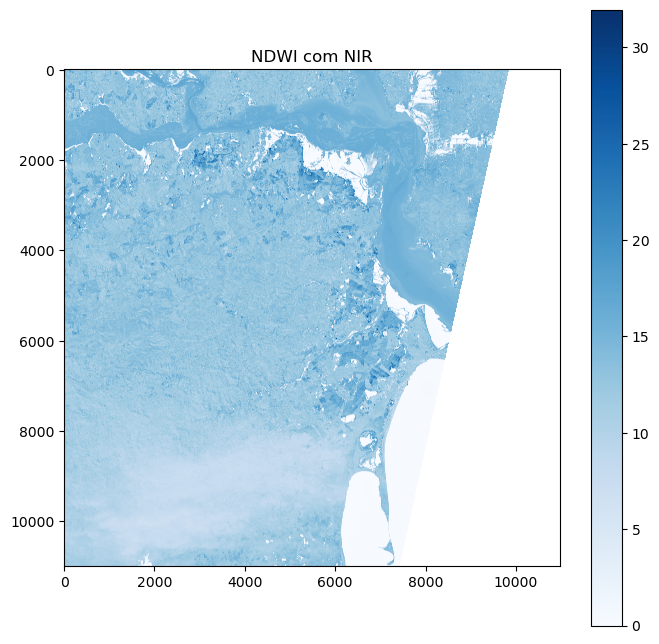

Erro ao processar as imagens: JP2 driver only supports creating Byte, GDT_Int16, GDT_UInt16, GDT_Int32, GDT_UInt32


In [9]:
import numpy as np
import rasterio
import matplotlib.pyplot as plt

# Função para ler uma banda específica de uma imagem e obter metadados
def read_band(file_path):
    with rasterio.open(file_path) as src:
        band = src.read(1)  # Lê a primeira banda
        metadata = src.meta
    return band, metadata

# Função para calcular NDWI usando NIR
def calculate_ndwi_nir(green_band, nir_band):
    return (green_band - nir_band) / (green_band + nir_band)

# Função para processar imagens e salvar o NDWI usando NIR
def process_images_ndwi_nir(image_path_green, image_path_nir):
    try:
        # Carregar as bandas das imagens e obter metadados
        green_band, metadata_green = read_band(image_path_green)
        nir_band, metadata_nir = read_band(image_path_nir)

        # Verificar se os metadados são iguais (assumimos que são iguais para simplificação)
        if metadata_green != metadata_nir:
            raise ValueError("Os metadados das imagens não correspondem.")

        # Calcular NDWI
        ndwi = calculate_ndwi_nir(green_band, nir_band)

        # Visualizar o NDWI
        plt.figure(figsize=(8, 8))
        plt.imshow(ndwi, cmap='Blues')
        plt.colorbar()
        plt.title('NDWI com NIR')
        plt.show()

        # Salvar o NDWI com georeferenciamento original
        output_path = 'ndwi_nir_georef.tif'
        metadata_green.update({
            'dtype': 'float32',  # Tipo de dado apropriado para NDWI
            'count': 1,          # Número de bandas no arquivo resultante
            'compress': 'lzw'    # Compressão opcional
        })

        with rasterio.open(output_path, 'w', **metadata_green) as dst:
            dst.write(ndwi, 1)

        print(f'Imagem NDWI com NIR salva em: {output_path}')

    except Exception as e:
        print(f"Erro ao processar as imagens: {e}")

# Substitua pelos caminhos corretos das suas imagens
image_path_green = 'L2A_T22JDM_A037430_20240506T133146/IMG_DATA/L2A_T22JDM_A037430_20240506T133146_R10m/T22JDM_20240506T133149_B03_10m.jp2'
image_path_nir = 'L2A_T22JDM_A037430_20240506T133146/IMG_DATA/L2A_T22JDM_A037430_20240506T133146_R10m/T22JDM_20240506T133149_B08_10m.jp2'

process_images_ndwi_nir(image_path_green, image_path_nir)


/tmp/ipykernel_97692/4024715203.py:14: RuntimeWarning: invalid value encountered in divide
  return (nir_band - red_band) / (nir_band + red_band)


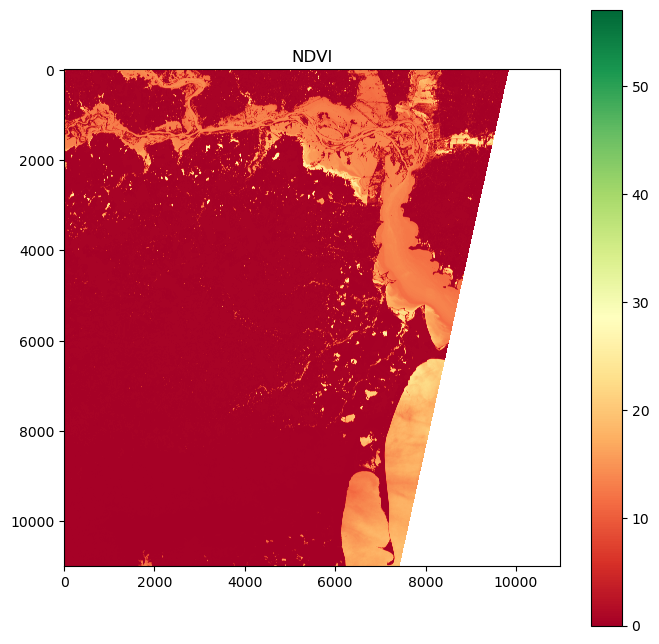

Erro ao processar as imagens: JP2 driver only supports creating Byte, GDT_Int16, GDT_UInt16, GDT_Int32, GDT_UInt32


In [10]:
import numpy as np
import rasterio
import matplotlib.pyplot as plt

# Função para ler uma banda específica de uma imagem e obter metadados
def read_band(file_path):
    with rasterio.open(file_path) as src:
        band = src.read(1)  # Lê a primeira banda
        metadata = src.meta
    return band, metadata

# Função para calcular NDVI
def calculate_ndvi(nir_band, red_band):
    return (nir_band - red_band) / (nir_band + red_band)

# Função para processar imagens e salvar o NDVI
def process_images_ndvi(image_path_nir, image_path_red):
    try:
        # Carregar as bandas das imagens e obter metadados
        nir_band, metadata_nir = read_band(image_path_nir)
        red_band, metadata_red = read_band(image_path_red)

        # Verificar se os metadados são iguais (assumimos que são iguais para simplificação)
        if metadata_nir != metadata_red:
            raise ValueError("Os metadados das imagens não correspondem.")

        # Calcular NDVI
        ndvi = calculate_ndvi(nir_band, red_band)

        # Visualizar o NDVI
        plt.figure(figsize=(8, 8))
        plt.imshow(ndvi, cmap='RdYlGn')
        plt.colorbar()
        plt.title('NDVI')
        plt.show()

        # Salvar o NDVI com georeferenciamento original
        output_path = 'ndvi_georef.tif'
        metadata_nir.update({
            'dtype': 'float32',  # Tipo de dado apropriado para NDVI
            'count': 1,          # Número de bandas no arquivo resultante
            'compress': 'lzw'    # Compressão opcional
        })

        with rasterio.open(output_path, 'w', **metadata_nir) as dst:
            dst.write(ndvi, 1)

        print(f'Imagem NDVI salva em: {output_path}')

    except Exception as e:
        print(f"Erro ao processar as imagens: {e}")

# Substitua pelos caminhos corretos das suas imagens
image_path_nir = 'L2A_T22JDM_A037430_20240506T133146/IMG_DATA/L2A_T22JDM_A037430_20240506T133146_R10m/T22JDM_20240506T133149_B08_10m.jp2'
image_path_red = 'L2A_T22JDM_A037430_20240506T133146/IMG_DATA/L2A_T22JDM_A037430_20240506T133146_R10m/T22JDM_20240506T133149_B04_10m.jp2'

process_images_ndvi(image_path_nir, image_path_red)
